In [1]:
import torch
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
def plot_graph(G,attribute):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    #nx.set_node_attributes(G, dict(zip(G.nodes(), classes)), 'class')

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1][attribute]] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show()

In [3]:
def plot_node_type_dist(node_types):
    
    fig, ax = plt.subplots()
    bins = np.arange(5) - 0.5

    data = list(node_types)
    colors = ['blue','red','darkgreen','orange']

    cnts, values, bars = ax.hist(data, edgecolor='w', bins=bins, rwidth=0.2)

    for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
        bar.set_facecolor(colors[i % len(colors)])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('node types',fontsize=20)
    plt.ylabel('no. of nodes',fontsize=20)
    plt.xticks([0,1,2,3])
    plt.xlim([-1, 4])
    plt.show()

In [4]:
def plot_node_type_dist_imdb(node_types):
    
    fig, ax = plt.subplots()
    bins = np.arange(5) - 0.5

    data = list(node_types)
    colors = ['blue','red','darkgreen']

    cnts, values, bars = ax.hist(data, edgecolor='w', bins=bins, rwidth=0.2)

    for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
        bar.set_facecolor(colors[i % len(colors)])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('node types',fontsize=20)
    plt.ylabel('no. of nodes',fontsize=20)
    plt.xticks([0,1,2])
    plt.xlim([-1, 3])
    plt.show()

### DBLP

In [5]:
G_real_dblp = nx.read_gexf('real_graphs/real_dblp_G20.gexf')

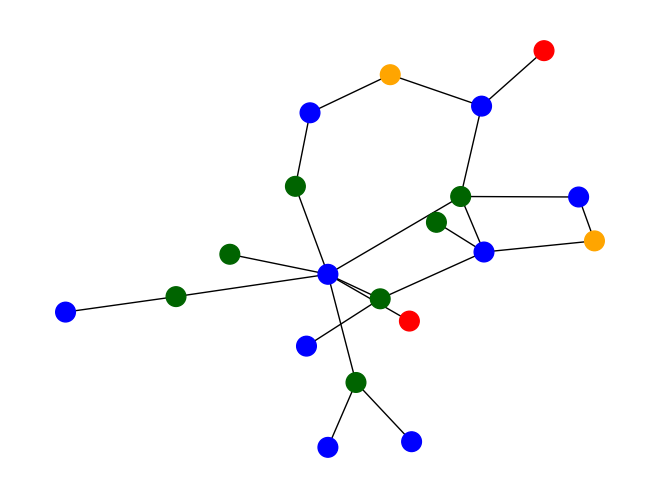

In [6]:
plot_graph(G_real_dblp,'node_type')

In [7]:
plt.rcParams.update({'axes.ymargin': 0.2})

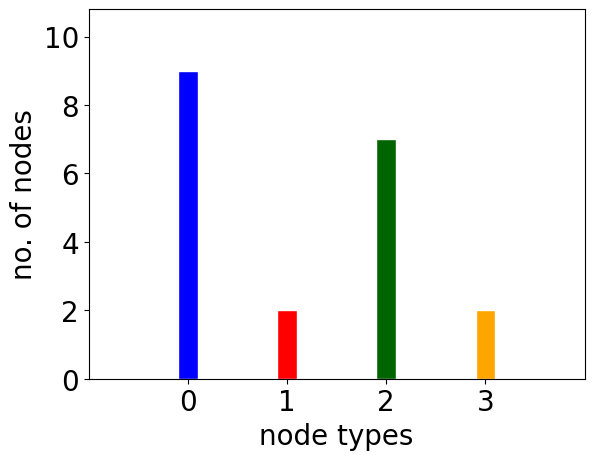

In [8]:
node_types=nx.get_node_attributes(G_real_dblp, "node_type")
plot_node_type_dist(list(node_types.values()))

In [9]:
#Approach1 - GMM

In [10]:
#Generate graphs of 2-hop neighbourhood
def graph_gen(nodeid, G):
    
    num_hops = 2  
    nodes = []
    edges = []
    #Get small graph nodes
    nodes = nx.single_source_shortest_path_length(G, nodeid, cutoff=num_hops).keys() 
    graph = nx.ego_graph(G,nodeid, num_hops, center=True,undirected = True)
    #Get small graph edges
    edges = [e for e in graph.edges]
    #plot_node_types(graph)
#     print('nodeid',nodeid)
    print('node count',len(nodes))
#     print('edge count',len(edges))
    return graph

In [11]:
def get_node_degree(G):
    #Adding node degree
    for node in G.nodes():
        d = G.degree(node)
        G.nodes[node]["degree"] = d
    return G

In [12]:
G_syn_dblp = nx.read_gexf("syn_graphs/dblp/DBLP_four_area_hgen.gexf")
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_dblp).nodes().items() if d['degree']>=2)
node_id = list(node_subset_syn.keys())[0]
twohop_G = graph_gen(node_id, G_syn_dblp)

node count 22


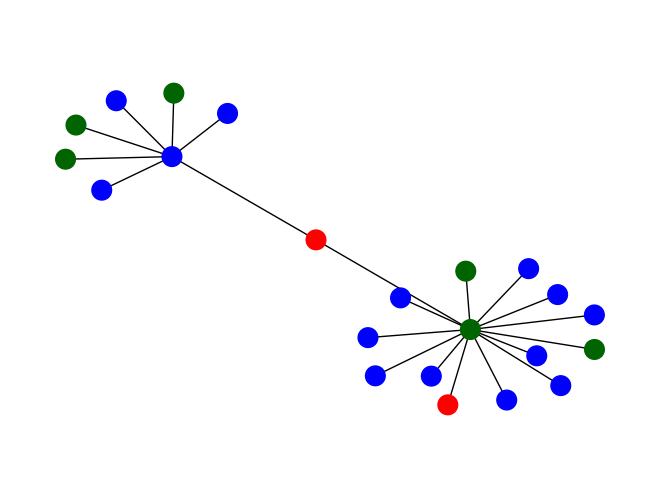

In [13]:
plot_graph(twohop_G,'class')

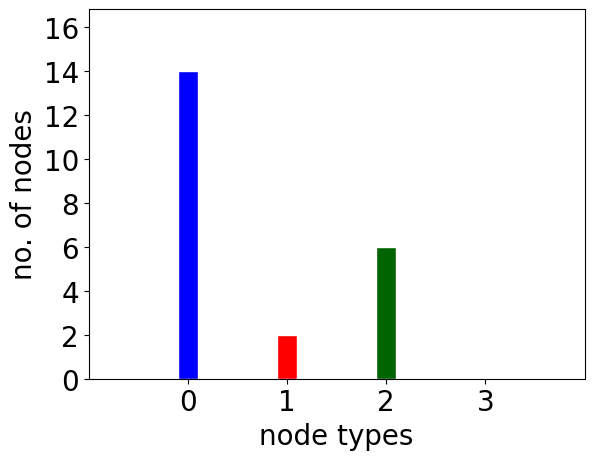

In [14]:
node_types=nx.get_node_attributes(twohop_G, "class")
plot_node_type_dist(list(node_types.values()))

VAE

In [15]:
G_syn_dblp_vae = nx.read_gexf('syn_graphs/dblp/sync499949232950/sync499949232950_G20.gexf')

In [16]:
syn_class_path = 'syn_graphs/dblp/sync499949232950/sync499949232950_node_class20.pt'
node_class_syn = torch.load(syn_class_path).detach().numpy()
nx.set_node_attributes(G_syn_dblp_vae, dict(zip(G_syn_dblp_vae.nodes(), node_class_syn)), 'class')

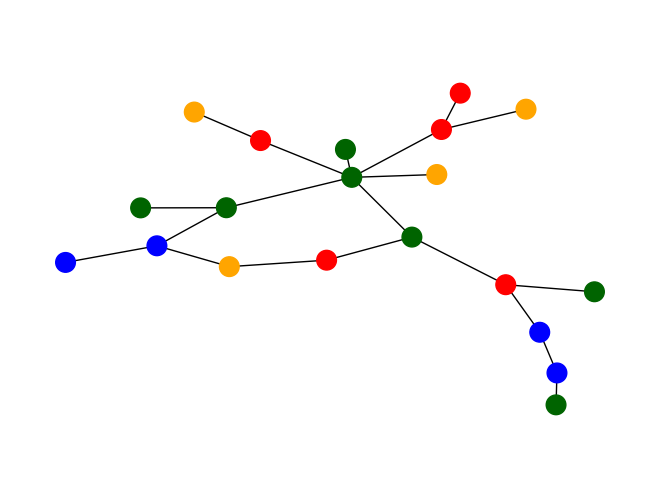

In [22]:
plot_graph(G_syn_dblp_vae,'class')

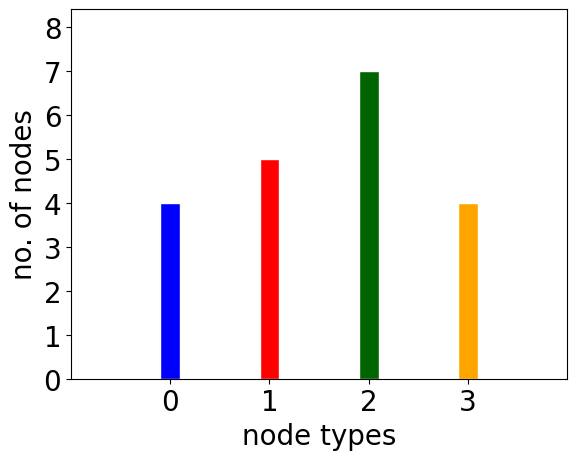

In [23]:
plot_node_type_dist(node_class_syn)

Diffusion

In [24]:
G_syn_dblp_diffusion = nx.read_gexf('syn_graphs/dblp/graph_8.gexf')

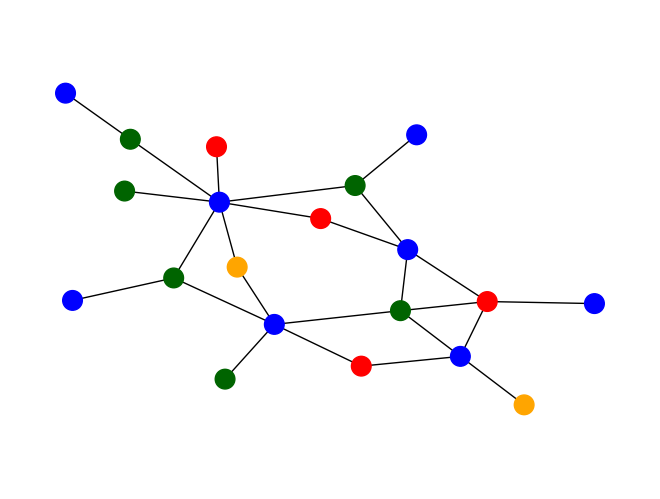

In [25]:
plot_graph(G_syn_dblp_diffusion,'color_val')

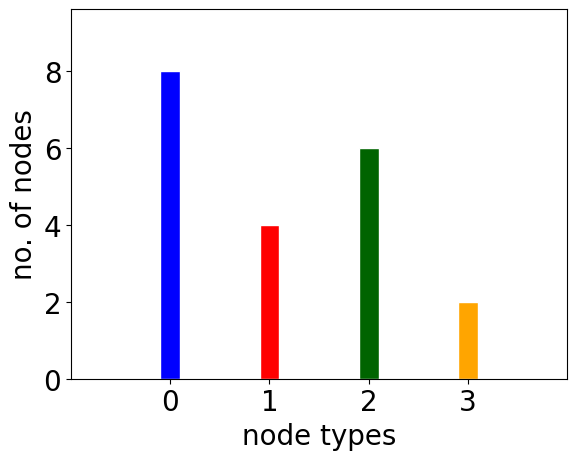

In [26]:
node_types=nx.get_node_attributes(G_syn_dblp_diffusion, "color_val")
plot_node_type_dist(list(node_types.values()))

### PubMed

In [27]:
G_real_pubmed = nx.read_gexf('real_graphs/real_pubmed_G20.gexf')

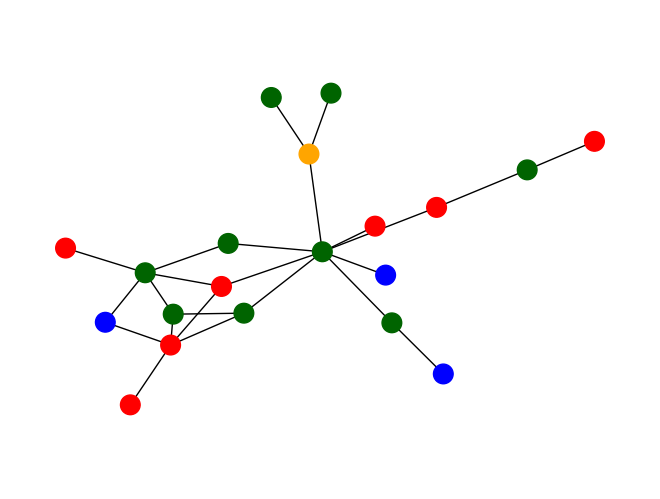

In [29]:
plot_graph(G_real_pubmed,'node_type')

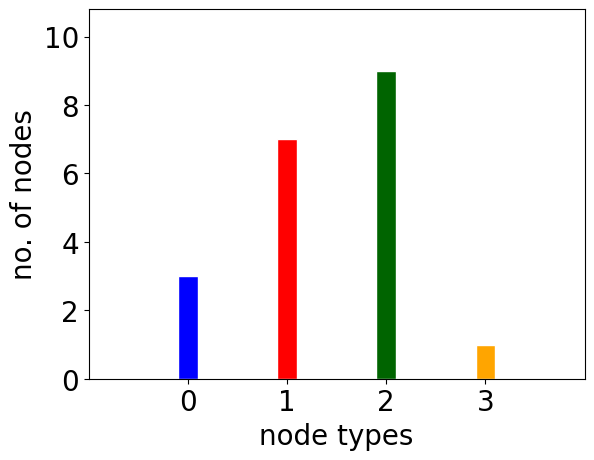

In [30]:
node_types=nx.get_node_attributes(G_real_pubmed, "node_type")
plot_node_type_dist(list(node_types.values()))

In [31]:
#GMM
G_syn_pubmed = nx.read_gexf("syn_graphs/pubmed/PubMed_hgen.gexf")
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_pubmed).nodes().items() if d['degree']>=2)
node_id = list(node_subset_syn.keys())[5]
twohop_G = graph_gen(node_id, G_syn_pubmed)

node count 22


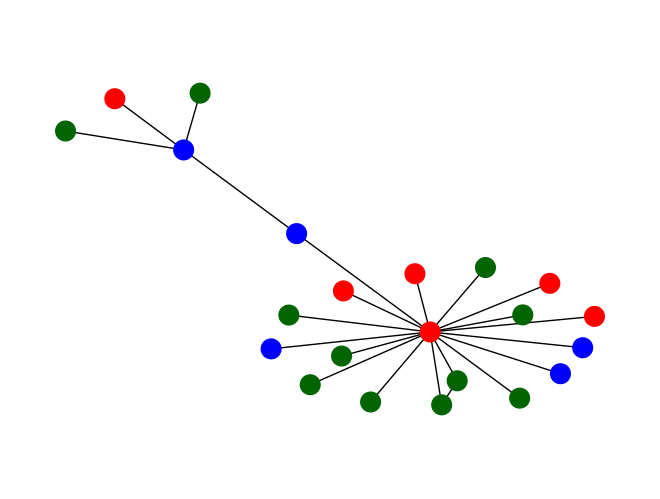

In [32]:
plot_graph(twohop_G,'class')

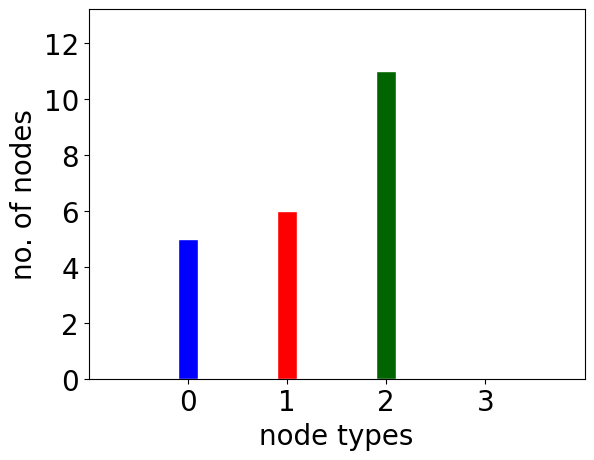

In [33]:
node_types=nx.get_node_attributes(twohop_G, "class")
plot_node_type_dist(list(node_types.values()))

In [34]:
#VAE
G_syn_pubmed_vae = nx.read_gexf('syn_graphs/pubmed/sync251517203446/sync251517203446_G20.gexf')

In [35]:
syn_class_path = 'syn_graphs/pubmed/sync251517203446/sync251517203446_node_class20.pt'
node_class_syn = torch.load(syn_class_path).detach().numpy()
nx.set_node_attributes(G_syn_pubmed_vae, dict(zip(G_syn_pubmed_vae.nodes(), node_class_syn)), 'class')

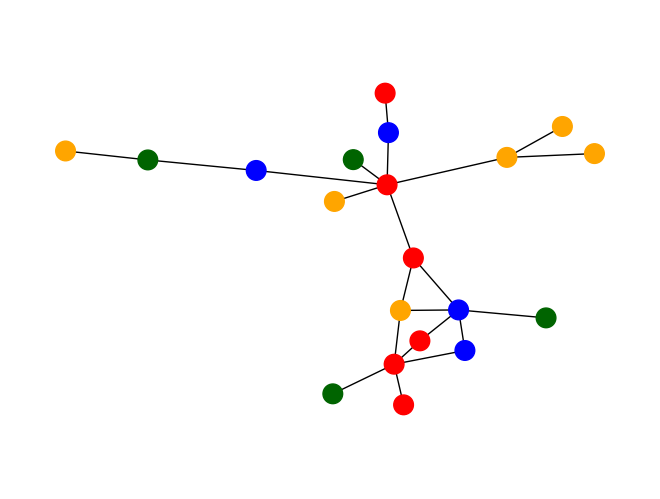

In [36]:
plot_graph(G_syn_pubmed_vae,'class')

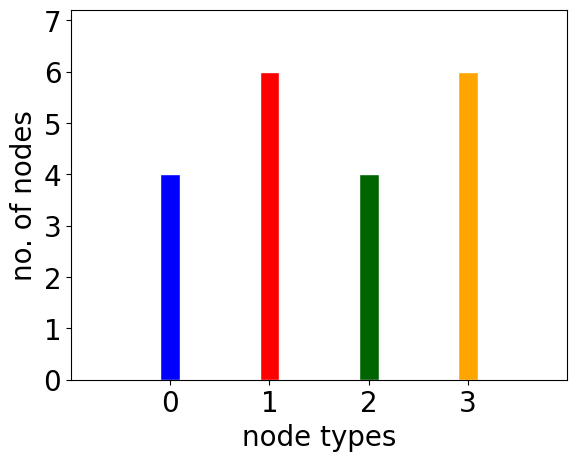

In [37]:
plot_node_type_dist(node_class_syn)

In [38]:
#Diffusion
G_syn_pubmed_diffusion = nx.read_gexf('syn_graphs/pubmed/graph_3.gexf')

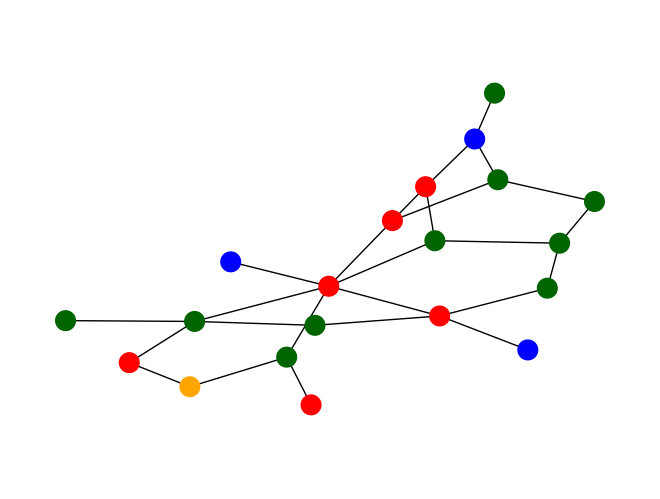

In [39]:
plot_graph(G_syn_pubmed_diffusion,'color_val')

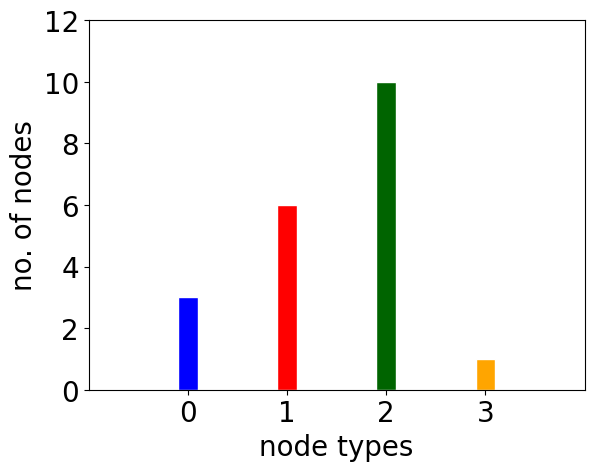

In [40]:
node_types=nx.get_node_attributes(G_syn_pubmed_diffusion, "color_val")
plot_node_type_dist(list(node_types.values()))

### IMDB

In [41]:
#For IMDB, remove the Genre node type
def remove_genre_nodes(graph):
    nodeId_list = []
    node_type_list = []
    for key, value in graph.nodes(data=True):
        nodeId_list.append(key)
        node_type_list.append(value['class'])


    df_graph = pd.DataFrame()
    df_graph["nodeId"] = nodeId_list
    df_graph["class"] = node_type_list 
    node3_list = list(df_graph[df_graph['class'] == 3]['nodeId'])

    df_edges = nx.to_pandas_edgelist(graph)
    df_edges = df_edges[['source','target']]
    df_edges = df_edges[~df_edges['source'].isin(node3_list)]
    df_edges= df_edges[~df_edges['target'].isin(node3_list)]
    
    small_graph = nx.from_pandas_edgelist(
    df_edges,

    create_using=nx.Graph(),
)
    node_class = df_graph[['nodeId','class']]
    nodes_attr = node_class.set_index('nodeId').to_dict(orient = 'index')
    nx.set_node_attributes(small_graph, nodes_attr)
    
    return small_graph

In [42]:
G_real_imdb= nx.read_gexf('real_graphs/real_imdb_G15.gexf')

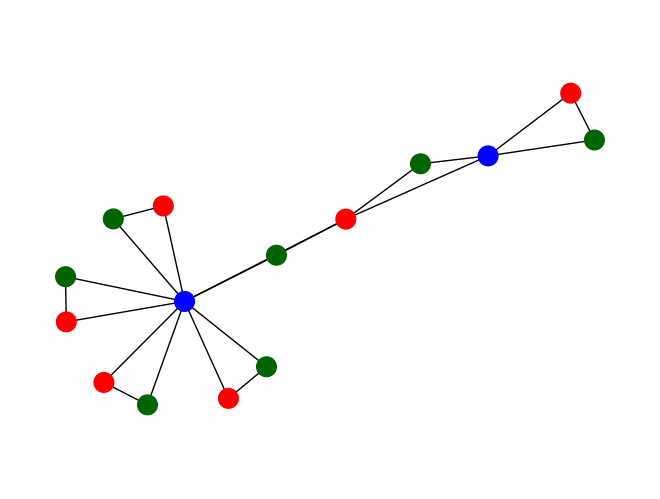

In [43]:
plot_graph(G_real_imdb,'node_type')

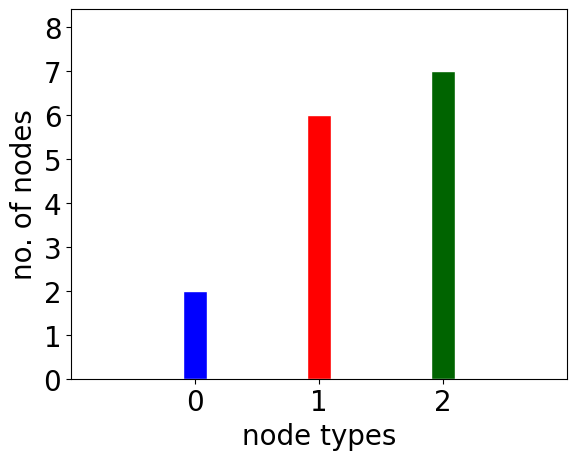

In [44]:
node_types=nx.get_node_attributes(G_real_imdb, "node_type")
plot_node_type_dist_imdb(list(node_types.values()))

In [45]:
#GMM

In [46]:
G_syn_imdb = nx.read_gexf("syn_graphs/imdb/IMDB_movie_hgen.gexf")

In [47]:
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_imdb).nodes().items() if d['degree']>=2)
node_id = list(node_subset_syn.keys())[0]
twohop = graph_gen(node_id, G_syn_imdb)
syn_small_graph = remove_genre_nodes(twohop)
print(syn_small_graph.nodes(data=True))
# plot_node_types(syn_small_graph)

node count 8
[('7', {'class': 0}), ('1011', {'class': 2}), ('1166', {'class': 2})]


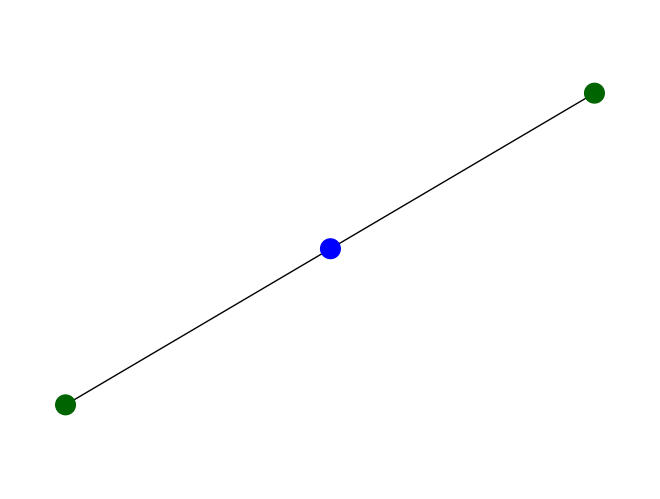

In [48]:
plot_graph(syn_small_graph,'class')

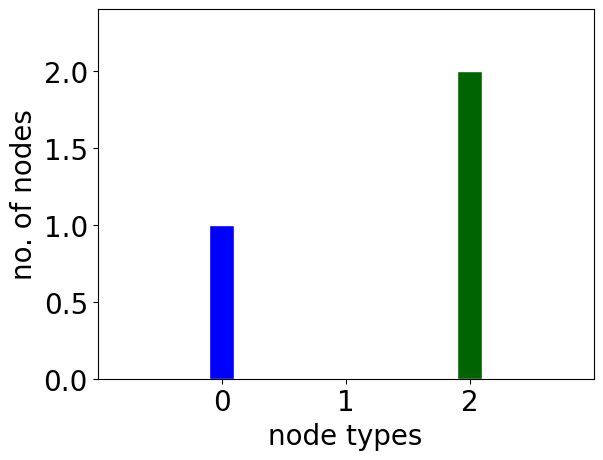

In [49]:
node_types=nx.get_node_attributes(syn_small_graph, "class")
plot_node_type_dist_imdb(list(node_types.values()))

In [50]:
#VAE
G_syn_imdb_vae = nx.read_gexf('syn_graphs/imdb/sync131870233442/sync131870233442_G15.gexf')

In [51]:
syn_class_path = 'syn_graphs/imdb/sync131870233442/sync131870233442_node_class15.pt'
node_class_syn = torch.load(syn_class_path).detach().numpy()
nx.set_node_attributes(G_syn_imdb_vae, dict(zip(G_syn_imdb_vae.nodes(), node_class_syn)), 'class')

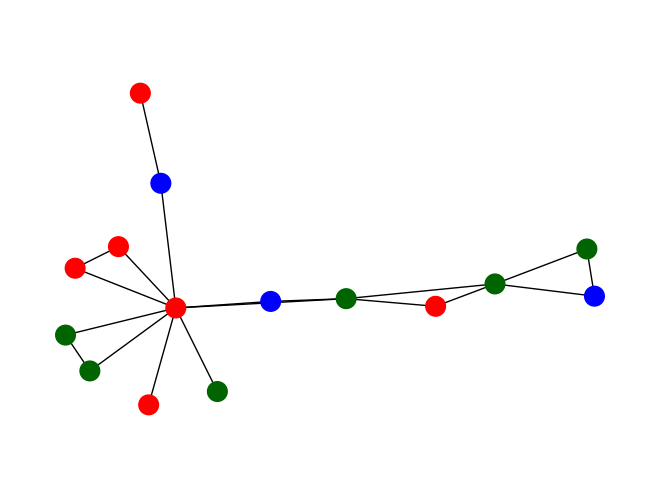

In [52]:
plot_graph(G_syn_imdb_vae,'class')

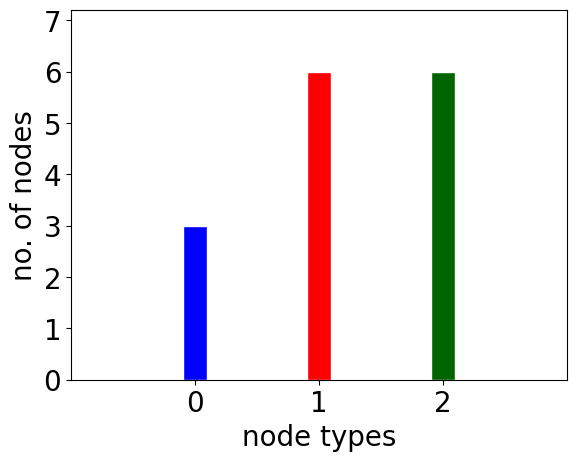

In [53]:
plot_node_type_dist_imdb(node_class_syn)

In [54]:
#Diffusion
G_syn_imdb_diffusion = nx.read_gexf('syn_graphs/imdb/graph_2.gexf')

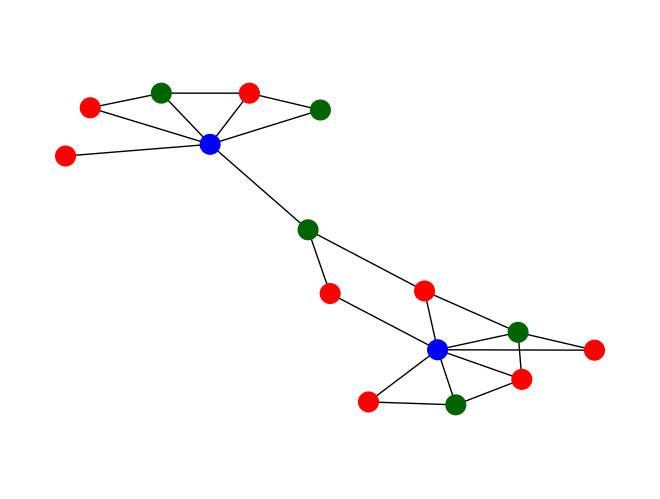

In [59]:
plot_graph(G_syn_imdb_diffusion,'color_val')

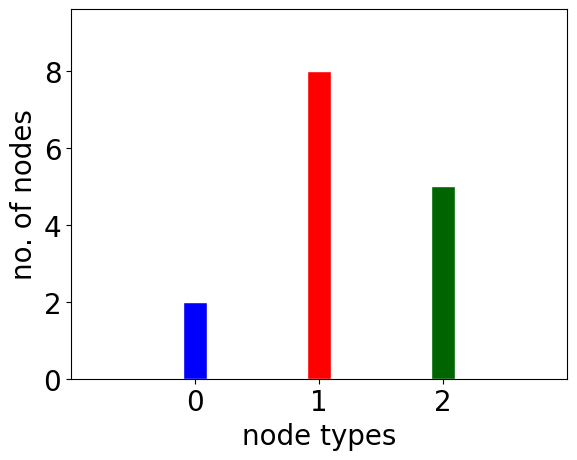

In [60]:
node_types=nx.get_node_attributes(G_syn_imdb_diffusion, "color_val")
plot_node_type_dist_imdb(list(node_types.values()))